# A Pseudoproxy Experiment with GraphEM and pseudoPAGES2k

**Expected time to run through: 10 mins**

This tutorial demonstrates how to get a reconstruction using GraphEM, leveraging a simple pseudoproxy dataset generated from iCESM gridded, with the realistic spatiotemporal availability of the PAGES2kv2 dataset.
The pseudoproxy are generated based on the original iCESM simulated `tas` plus white noise with `SNR=1`, using below code block:

## Test data preparation

To go through this tutorial, please prepare test data following the steps:

Download the test case named “PPE_PAGES2k” with this [link](https://drive.google.com/drive/folders/1_h6o_gDR6xLX50c_Ad-lzRoWwHlAgBnK?usp=sharing).
Create a directory named “testcases” in the same directory where this notebook sits.
Put the unzipped direcotry “PPE_PAGES2k” into “testcases”.

Below, we first load some useful packages, including our `GraphEM`.

In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
import GraphEM
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as  plt

## Reconstruction

In [2]:
job = GraphEM.ReconJob()

In [3]:
job.load_configs('./testcases/PPE_PAGES2k/configs.yml', verbose=True)

GraphEM: job.load_configs() >>> loading reconstruction configurations from: ./testcases/PPE_PAGES2k/configs.yml
GraphEM: job.load_configs() >>> job.configs created
GraphEM: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon
GraphEM: job.load_configs() >>> /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon created
{'anom_period': [1951, 1980],
 'calib_period': [1900, 2000],
 'job_dirpath': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon',
 'job_id': 'GraphEM_tutorial',
 'obs_path': {'tas': './data/obs/iCESM_ann.nc'},
 'obs_regrid_ntrunc': 21,
 'obs_varname': {'lat': 'lat', 'lon': 'lon', 'tas': 'tas'},
 'proxydb_path': './data/proxy/pseudoPAGES2k_dataset_tas_wn_full_temporal_availability.pkl',
 'ptype_list': 'all',
 'recon_period': [1000, 2000]}


In [4]:
job.load_proxydb(verbose=True)

GraphEM: job.load_proxydb() >>> job.configs["proxydb_path"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/proxy/pseudoPAGES2k_dataset_tas_wn_full_temporal_availability.pkl
GraphEM: job.load_proxydb() >>> 692 records loaded
GraphEM: job.load_proxydb() >>> job.proxydb created


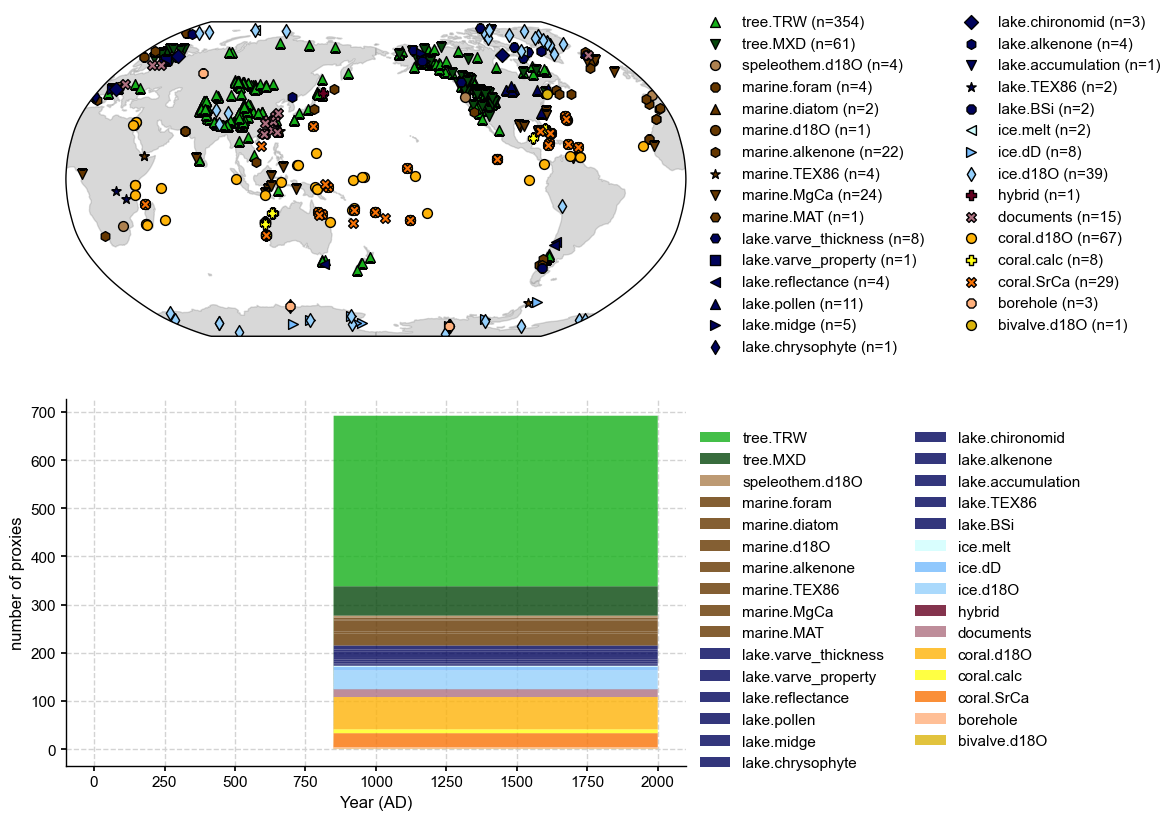

In [5]:
fig, ax = job.proxydb.plot()

In [6]:
job.load_obs(verbose=True)
print(job.obs)

GraphEM: job.load_obs() >>> loading instrumental observation fields from: {'tas': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/obs/iCESM_ann.nc'}
GraphEM: job.load_obs() >>> job.obs created
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/obs/iCESM_ann.nc
    Shape:  time:1156, lat:96, lon:144


In [7]:
# regrid obs to make the problem size smaller
job.regrid_obs(verbose=True)

LMRt: job.regrid_obs() >>> regridded obs
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/obs/iCESM_ann.nc
    Shape:  time:1156, lat:22, lon:33
LMRt: job.regrid_obs() >>> job.obs updated


Since the loaded iCESM simulation and the pseudoproxy dataset are already annualized, we can skip the `.seasonalize()` steps and run `.prep_data()` directly.

In [8]:
job.prep_data(verbose=True)

GraphEM: job.prep_data() >>> job.recon_time created
GraphEM: job.prep_data() >>> job.calib_time created
GraphEM: job.prep_data() >>> job.calib_idx created
GraphEM: job.prep_data() >>> job.temp created
GraphEM: job.prep_data() >>> job.df_proxy created
GraphEM: job.prep_data() >>> job.proxy created
GraphEM: job.prep_data() >>> job.lonlat created


In [9]:
job.df_proxy

,NAm_153,Asi_245,NAm_165,Asi_178,Asi_174,Eur_016,Asi_198,NAm_145,Arc_070,Arc_071,...,Asi_119,Ocn_153,NAm_074,Asi_026,Ocn_169,Asi_201,Asi_179,Arc_014,Ocn_071,Ocn_072
1000.0,1.991316,1.076783,0.410502,-0.173932,0.202598,1.351549,-0.460631,1.628941,1.370160,1.164753,...,0.808244,0.282663,1.117257,0.799945,0.155647,-0.931838,-0.086837,-0.035836,-0.421204,0.792450
1001.0,1.474484,-0.308733,0.249446,0.598656,-0.056904,0.137913,0.376916,-3.876324,-1.509714,2.864117,...,0.542854,-0.138603,2.097570,0.012348,-0.525504,-1.882890,0.717570,1.830759,-1.086185,-0.031783
1002.0,-1.749010,0.078419,-1.069865,-1.118535,-0.339929,-0.475327,2.033267,0.087343,0.360542,-2.410067,...,-0.461850,-0.454381,-1.528630,0.882063,-0.135203,-0.621540,-0.043420,-0.330917,-0.577220,-0.124923
1003.0,0.217035,1.674967,-1.750278,-0.575866,0.136504,0.781710,1.011006,2.542533,-1.087626,-0.919410,...,0.031054,0.438249,1.705930,-0.225784,0.544517,-0.056655,0.483183,-0.960525,0.207954,0.649017
1004.0,0.209092,0.179273,1.226517,-0.167719,0.824626,-0.052601,2.230018,1.007028,-1.957817,2.547536,...,-0.124999,-0.354393,-0.472327,0.725839,-0.056934,1.691067,-0.086595,-1.855176,0.066563,-0.316830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996.0,0.451554,-0.012429,-0.483565,-1.308976,-0.431576,-0.061208,2.699160,3.148305,1.170936,-0.781837,...,0.033587,0.786702,0.344960,-0.690816,0.565884,0.758542,-0.395638,0.221436,0.532183,0.780281
1997.0,0.593906,-0.391556,1.189919,-0.983018,-0.086014,0.744214,1.883391,-0.916550,-1.326753,0.781728,...,-0.087708,0.080720,-0.069768,-0.437823,-0.329610,-0.499093,-0.083515,-1.862747,-0.084249,-0.521903
1998.0,1.543173,-0.586401,0.886359,0.631522,0.272213,0.101556,-0.464913,0.124083,3.749645,2.468217,...,-0.591060,0.393950,1.165156,0.295951,-0.324858,0.856186,0.527396,2.117025,0.006060,0.662496
1999.0,1.311804,-0.147377,0.121918,0.649256,-0.359322,-0.908425,0.380988,2.338570,2.703852,0.715449,...,0.381650,0.259597,0.473400,0.211626,-0.041561,-0.057345,-0.231382,0.319323,1.100090,0.053861


In [10]:
print(np.shape(job.temp))
print(np.shape(job.proxy))
print(np.shape(job.lonlat))

(1001, 726)
(1001, 692)
(1418, 2)


In [11]:
job.save(verbose=True)

LMRt: job.save_job() >>> Prepration data saved to: /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon/job.pkl
LMRt: job.save_job() >>> job.configs["prep_savepath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon/job.pkl


In [12]:
%%time

# need to remove G.pkl if the previous run is problematic
save_path = './testcases/PPE_PAGES2k/recon/G.pkl'
job.run_solver(save_path=save_path, verbose=True)

Estimating graph using neighborhood method
Running GraphEM:

Iter     dXmis     rdXmis

001     0.0982     0.7515
002     0.1367     0.8326
003     0.1295     0.7656
004     0.1024     0.3950
005     0.0741     0.2227
006     0.0617     0.1605
007     0.0534     0.1254
008     0.0474     0.1023
009     0.0437     0.0877
010     0.0414     0.0778
011     0.0401     0.0711
012     0.0394     0.0662
013     0.0389     0.0621
014     0.0388     0.0591
015     0.0389     0.0565
016     0.0391     0.0544
017     0.0398     0.0531
018     0.0405     0.0517
019     0.0416     0.0509
020     0.0424     0.0499
021     0.0430     0.0486
022     0.0434     0.0472
023     0.0435     0.0456
024     0.0438     0.0443
025     0.0433     0.0422
026     0.0428     0.0404
027     0.0423     0.0386
028     0.0417     0.0370
029     0.0405     0.0349
030     0.0397     0.0332
031     0.0388     0.0317
032     0.0380     0.0303
033     0.0366     0.0284
034     0.0355     0.0270
035     0.0353     0.0262
03

In [13]:
job.save_recon('./testcases/PPE_PAGES2k/recon/recon.nc', verbose=True)

LMRt: job.save_recon() >>> Reconstruction saved to: ./testcases/PPE_PAGES2k/recon/recon.nc


## Validation

In [14]:
with xr.open_dataset('./testcases/PPE_PAGES2k/recon/recon.nc') as ds:
    print(ds)

<xarray.Dataset>
Dimensions:  (lat: 22, lon: 33, year: 1001)
Coordinates:
  * year     (year) int64 1000 1001 1002 1003 1004 ... 1996 1997 1998 1999 2000
  * lat      (lat) float64 -85.91 -77.73 -69.55 -61.36 ... 69.55 77.73 85.91
  * lon      (lon) float64 0.0 10.91 21.82 32.73 ... 316.4 327.3 338.2 349.1
Data variables:
    recon    (year, lat, lon) float64 ...


In [20]:
target = job.obs.fields['tas'].value[:1001]
print(np.shape(target))

(1001, 22, 33)


### Mean Statistics

In [21]:
nt = np.size(ds['year'])
temp_r = job.recon.reshape((nt, -1))
V = GraphEM.solver.verif_stats(temp_r, target.reshape((nt, -1)), job.calib_idx)
print(V)

Mean MSE = 5.5593, Mean RE = -5.1086, Mean CE = -5.7476, Mean R2 = 0.0014


### Map of CE

In [22]:
ce = LMRt.utils.coefficient_efficiency(target, ds['recon'])
print(np.shape(ce))

(22, 33)


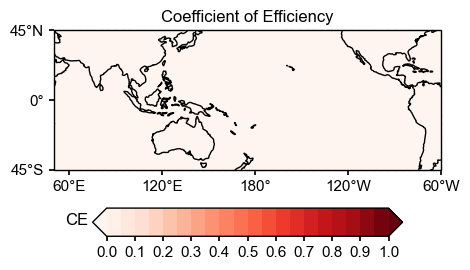

In [23]:
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig = plt.figure(figsize=[5, 5])
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_title('Coefficient of Efficiency')
latlon_range = [50, 300, -45, 45]
transform=ccrs.PlateCarree()

ax.set_extent(latlon_range, crs=transform)
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

lon_ticks=[60, 120, 180, 240, 300]
lat_ticks=[-90, -45, 0, 45, 90]
lon_ticks = np.array(lon_ticks)
lat_ticks = np.array(lat_ticks)
lon_min, lon_max, lat_min, lat_max = latlon_range
mask_lon = (lon_ticks >= lon_min) & (lon_ticks <= lon_max)
mask_lat = (lat_ticks >= lat_min) & (lat_ticks <= lat_max)
ax.set_xticks(lon_ticks[mask_lon], crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks[mask_lat], crs=ccrs.PlateCarree())

levels = np.linspace(0, 1, 21)
cbar_labels = np.linspace(0, 1, 11)
cbar_title = 'CE'
extend = 'both'
cmap = 'Reds'
cbar_pad=0.1
cbar_orientation='horizontal'
cbar_aspect=10
cbar_fraction=0.35
cbar_shrink=0.8
font_scale=1.5
land_color=sns.xkcd_rgb['light grey']
ocean_color=sns.xkcd_rgb['white']
        
ax.add_feature(cfeature.LAND, facecolor=land_color, edgecolor=land_color)
ax.add_feature(cfeature.OCEAN, facecolor=ocean_color, edgecolor=ocean_color)
ax.coastlines()
im = ax.contourf(ds['lon'].values, ds['lat'].values, ce, levels, transform=transform, cmap=cmap, extend=extend)
cbar = fig.colorbar(
    im, ax=ax, orientation=cbar_orientation, pad=cbar_pad, aspect=cbar_aspect,
    fraction=cbar_fraction, shrink=cbar_shrink)
cbar.set_ticks(cbar_labels)
cbar.ax.set_title(cbar_title, x=-0.05, y=0.1)
    
LMRt.showfig(fig)

### Mean timeseries

In [24]:
import pyleoclim as pyleo

In [25]:
def geo_mean(field, lat):
    m = np.average(
        np.average(field, axis=-1), axis=-1, weights=np.cos(np.deg2rad(lat))
    )
    return m

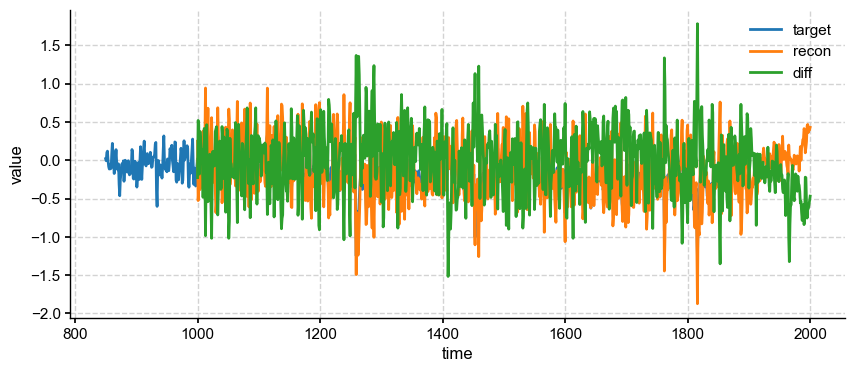

In [30]:
m_target = geo_mean(job.obs.fields['tas'].value[:1001], job.obs.fields['tas'].lat) 
ts_target = pyleo.Series(time=job.obs.fields['tas'].time[:1001], value=m_target)

m_recon = geo_mean(ds['recon'].values, ds['lat'].values)
ts_recon = pyleo.Series(time=ds['year'].values, value=m_recon)

fig, ax = ts_target.plot(mute=True, label='target')
ts_recon.plot(ax=ax, label='recon')
ax.plot(ds['year'].values, m_target-m_recon, label='diff')
ax.legend()
pyleo.showfig(fig)